In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
%matplotlib inline

In [4]:
from keras.preprocessing.image import ImageDataGenerator

#Image Data Generator w/ no augmentation
#Scaling for pixels
piece_train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

piece_test_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_valid_datagen = ImageDataGenerator(
    rescale = 1./255)


#Flow data from directory

piece_train_iter = piece_train_datagen.flow_from_directory(
    directory = '../data/piece_data/train',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

piece_test_iter = piece_test_datagen.flow_from_directory(
    directory = '../data/piece_data/test',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle=False,
    seed=42
)

piece_valid_iter = piece_valid_datagen.flow_from_directory(
    directory = '../data/piece_data/valid',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

Found 1227 images belonging to 7 classes.
Found 335 images belonging to 7 classes.
Found 331 images belonging to 7 classes.


In [5]:
#Define NN architecture

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

piece_model = Sequential()
piece_model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(135, 135, 1)))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Dropout(0.3))
piece_model.add(GlobalAveragePooling2D())
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dropout(0.4))
piece_model.add(Dense(7, activation='softmax'))


piece_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 135, 135, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 67, 67, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 67, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 67, 67, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
batch_normalization_2

In [6]:
# compile the model
from keras.optimizers import RMSprop

piece_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), 
                  metrics=['accuracy'])

STEP_SIZE_TRAIN = piece_train_iter.n/piece_train_iter.batch_size
STEP_SIZE_VALID = piece_valid_iter.n/piece_valid_iter.batch_size



In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='piece_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
piece_hist = piece_model.fit_generator(generator=piece_train_iter, 
                          steps_per_epoch=STEP_SIZE_TRAIN, 
                          validation_data=piece_valid_iter, 
                          validation_steps=STEP_SIZE_VALID,
                          epochs=1500, 
                          callbacks=[checkpointer], 
                          verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1500
 - 28s - loss: 1.9197 - acc: 0.2078 - val_loss: 1.8635 - val_acc: 0.2900

Epoch 00001: val_loss improved from inf to 1.86351, saving model to piece_model.weights.best.hdf5
Epoch 2/1500
 - 26s - loss: 1.8543 - acc: 0.2577 - val_loss: 1.8127 - val_acc: 0.2779

Epoch 00002: val_loss improved from 1.86351 to 1.81270, saving model to piece_model.weights.best.hdf5
Epoch 3/1500
 - 29s - loss: 1.8165 - acc: 0.2937 - val_loss: 1.7801 - val_acc: 0.2810

Epoch 00003: val_loss improved from 1.81270 to 1.78013, saving model to piece_model.weights.best.hdf5
Epoch 4/1500
 - 27s - loss: 1.7815 - acc: 0.2909 - val_loss: 1.7456 - val_acc: 0.2779

Epoch 00004: val_loss improved from 1.78013 to 1.74562, saving model to piece_model.weights.best.hdf5
Epoch 5/1500
 - 26s - loss: 1.7560 - acc: 0.2818 - val_loss: 1.7182 - val_acc: 0.2900

Epoch 00005: val_loss improved from 1.74562 to 1.71817, saving model to piece_model.weights.best.hdf5
Epoch 6/150

 - 29s - loss: 1.3073 - acc: 0.4726 - val_loss: 1.3763 - val_acc: 0.4320

Epoch 00045: val_loss did not improve from 1.37079
Epoch 46/1500
 - 29s - loss: 1.2993 - acc: 0.5003 - val_loss: 1.4209 - val_acc: 0.3958

Epoch 00046: val_loss did not improve from 1.37079
Epoch 47/1500
 - 30s - loss: 1.2659 - acc: 0.4994 - val_loss: 1.3669 - val_acc: 0.4350

Epoch 00047: val_loss improved from 1.37079 to 1.36689, saving model to piece_model.weights.best.hdf5
Epoch 48/1500
 - 30s - loss: 1.2752 - acc: 0.4990 - val_loss: 1.4367 - val_acc: 0.3927

Epoch 00048: val_loss did not improve from 1.36689
Epoch 49/1500
 - 30s - loss: 1.2593 - acc: 0.4892 - val_loss: 1.3603 - val_acc: 0.4230

Epoch 00049: val_loss improved from 1.36689 to 1.36035, saving model to piece_model.weights.best.hdf5
Epoch 50/1500
 - 30s - loss: 1.2460 - acc: 0.5219 - val_loss: 1.3581 - val_acc: 0.4320

Epoch 00050: val_loss improved from 1.36035 to 1.35808, saving model to piece_model.weights.best.hdf5
Epoch 51/1500
 - 31s - loss

KeyboardInterrupt: 

In [6]:
#Reset test iterator
STEP_SIZE_TEST = piece_test_iter.n/piece_test_iter.batch_size
piece_test_iter.reset()
# load the weights that yielded the best validation accuracy
piece_model.load_weights('piece_model.weights.best.hdf5')
# evaluate and print test accuracy
score = piece_model.evaluate_generator(generator=piece_test_iter,steps=STEP_SIZE_TEST)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.910447761194


In [7]:
piece_test_iter.reset()
piece_pred = piece_model.predict_generator(piece_test_iter,steps=STEP_SIZE_TEST,verbose=1)

10/10 [===========================>..] - ETA: 0s

In [8]:
predicted_class_indices=np.argmax(piece_pred,axis=1)
print(predicted_class_indices)

[0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 3 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 4 1 1 4 1 1 1 1 4 1 1
 1 1 1 1 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 3 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3
 3 3 3 0 3 3 3 4 0 4 4 4 1 4 4 1 4 4 4 4 4 4 4 4 4 4 0 4 4 5 5 4 4 1 4 4 4
 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]


In [9]:
labels = (piece_test_iter.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
truth =  [labels[k] for k in piece_test_iter.classes]

In [10]:
[labels[k] for k in piece_test_iter.classes]


['bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',

In [11]:
piece_test_iter.filenames

['bishop/1538778538.3017461.jpg',
 'bishop/1539025832.837544.jpg',
 'bishop/1539025486.6533895.jpg',
 'bishop/1538779519.5865016.jpg',
 'bishop/1538778643.4925923.jpg',
 'bishop/1539023363.830272.jpg',
 'bishop/1539025801.510389.jpg',
 'bishop/1538778410.6081142.jpg',
 'bishop/1538778215.8878355.jpg',
 'bishop/1538778752.467536.jpg',
 'bishop/1539025373.0113628.jpg',
 'bishop/1539023140.397658.jpg',
 'bishop/1539025334.2429533.jpg',
 'bishop/1538778214.3746974.jpg',
 'bishop/1539023732.561326.jpg',
 'bishop/1538777556.4695792.jpg',
 'bishop/1539024760.3120384.jpg',
 'bishop/1538778091.9695802.jpg',
 'bishop/1539024593.521976.jpg',
 'bishop/1538779155.2682924.jpg',
 'bishop/1538778833.610855.jpg',
 'bishop/1538777891.4931645.jpg',
 'bishop/1539017656.6888525_5.jpg',
 'bishop/1538778427.8668559.jpg',
 'bishop/1538777675.2653856.jpg',
 'bishop/1538778093.2397656.jpg',
 'bishop/1539024725.794323.jpg',
 'bishop/1539026035.275597.jpg',
 'bishop/1539024424.9014952.jpg',
 'bishop/1539024039.37

In [12]:
filenames=piece_test_iter.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Truth": truth,
                      "Predictions":predictions})

In [13]:
results

,Filename,Predictions,Truth
0,bishop/1538778538.3017461.jpg,bishop,bishop
1,bishop/1539025832.837544.jpg,bishop,bishop
2,bishop/1539025486.6533895.jpg,bishop,bishop
3,bishop/1538779519.5865016.jpg,bishop,bishop
4,bishop/1538778643.4925923.jpg,bishop,bishop
5,bishop/1539023363.830272.jpg,bishop,bishop
6,bishop/1539025801.510389.jpg,pawn,bishop
7,bishop/1538778410.6081142.jpg,bishop,bishop
8,bishop/1538778215.8878355.jpg,bishop,bishop
9,bishop/1538778752.467536.jpg,king,bishop


In [14]:
#Confusion Matrix
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_true=piece_test_iter.classes, y_pred=predicted_class_indices)
print(confusion_matrix)

[[42  1  1  3  0  0  0]
 [ 0 26  0  0  7  0  0]
 [ 2  2 54  1  2  0  0]
 [ 3  0  0 48  0  0  0]
 [ 2  3  0  0 25  2  0]
 [ 0  0  0  1  0 60  0]
 [ 0  0  0  0  0  0 50]]


In [15]:
print(labels)

{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


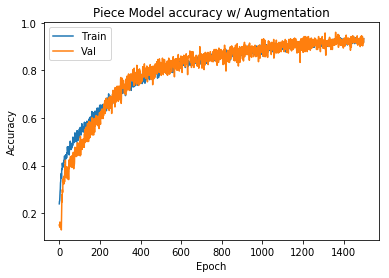

In [16]:
plt.plot(piece_hist.history['acc'])
plt.plot(piece_hist.history['val_acc'])
plt.title('Piece Model accuracy w/ Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

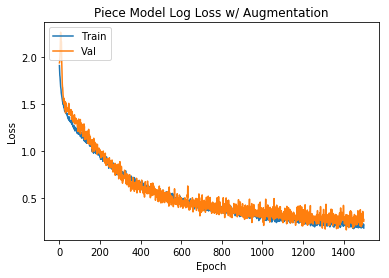

In [17]:
plt.plot(piece_hist.history['loss'])
plt.plot(piece_hist.history['val_loss'])
plt.title('Piece Model Log Loss w/ Augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(piece_test_iter.classes,predicted_class_indices)
print(cmatrix)
print(labels)

[[42  1  1  3  0  0  0]
 [ 0 26  0  0  7  0  0]
 [ 2  2 54  1  2  0  0]
 [ 3  0  0 48  0  0  0]
 [ 2  3  0  0 25  2  0]
 [ 0  0  0  1  0 60  0]
 [ 0  0  0  0  0  0 50]]
{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


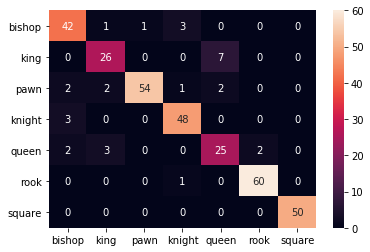

In [19]:
import seaborn as sns
ax = sns.heatmap(cmatrix, annot=True, xticklabels=['bishop','king','pawn','knight','queen','rook','square'],yticklabels=['bishop','king','pawn','knight','queen','rook','square'])

In [20]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

0.269091051679
